## Purpose of Project

The aim of this project is to optimize the stock porfolio on the basis of [Modern Portfolio Theory]('https://en.wikipedia.org/wiki/Modern_portfolio_theory') using the market data from [yfinance]("https://finance.yahoo.com/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAENl-Rw9rbPmTdeOMhsPnzbWd92c_ZV1PuVRH3gZocOmVu6hISf3NMx5odkHOUYbOH6PRchNxWkQd53n9nolGkMu-AMgn1zHxoWImsuRxv8q3bt06HfJXxpSfUDMoBixS5H5Vz9Ahj_haGbMVazpwbt37FdXPPgmAxBf--mCHqCX")

Modern portfolio Theory - is a foundational framework in finance for constructing portfolios that maximize returns for a given level of risk. It emphasizes diversification and the trade-off between risk and return.

Yfinance - Python library that helps in downloading market data from yahoo finance. Generally used for financial analysis.

## Importing the data through Yfinance

In [4]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# list of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# reset index to bring Date into the columns for the melt function
data = data.reset_index()

data.head(5)


Price        Date        Close                                         \
Ticker             HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
0      2024-02-12  1371.274658  1637.910645  1442.524780  4061.874023   
1      2024-02-13  1375.664673  1642.248901  1455.188599  4090.262451   
2      2024-02-14  1365.404785  1624.359619  1471.353516  4041.568359   
3      2024-02-15  1395.000732  1634.254639  1460.651367  4044.623779   
4      2024-02-16  1400.771851  1658.919434  1450.694092  4069.364990   

Price          High                                                 Low  ...  \
Ticker  HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS  ...   
0       1394.606082  1650.437942  1451.116287  4100.218600  1364.714219  ...   
1       1385.431329  1646.684574  1468.994590  4110.469797  1365.700759  ...   
2       1372.754374  1627.528008  1473.613150  4056.156887  1345.180951  ...   
3       1396.431151  1645.368394  1474.680812  4087.108108  1365.700762  ...   
4       1408.466701  1666.084842  1467.008024  4088.734856  1389.476027  ...   

Price                                    Open                            \
Ticker  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS  RELIANCE.NS   
0       1432.592431  4046.939916  1380.794683  1628.405479  1450.867978   
1       1444.163714  4023.233207  1373.198352  1640.737776  1445.653567   
2       1447.640030  3991.690613  1357.463183  1618.510287  1447.640030   
3       1456.603983  4024.711958  1366.342030  1634.888340  1473.315113   
4       1448.682888  4041.567857  1404.717965  1646.587067  1466.486552   

Price                    Volume                                
Ticker       TCS.NS HDFCBANK.NS  INFY.NS RELIANCE.NS   TCS.NS  
0       4071.041066  17223906.0  3555808     6674430  1013716  
1       4066.555977  28790497.0  2696481     7715594  1257415  
2       4048.369761  45660405.0  3768579     7117888  1391283  
3       4069.069547  20792472.0  4834391    10006782  1091582  
4       4054.530034  16087871.0  4880654     9767498  1307556  

[5 rows x 21 columns]

### Changing data from wide to long format

In [6]:
# Flatten the MultiIndex by joining the levels
data.columns = ['_'.join(filter(None, col)) for col in data.columns]

# Melt the DataFrame to long format
data_melted = data.melt(id_vars=['Date'], var_name='Attribute_Ticker', value_name='Value')

# Split the combined 'Attribute_Ticker' column into 'Attribute' and 'Ticker'
data_melted[['Attribute', 'Ticker']] = data_melted['Attribute_Ticker'].str.split('_', expand=True)

# Drop the intermediate column
data_melted = data_melted.drop(columns=['Attribute_Ticker'])

print(data_melted.head())


        Date        Value Attribute       Ticker
0 2024-02-12  1371.274658     Close  HDFCBANK.NS
1 2024-02-13  1375.664673     Close  HDFCBANK.NS
2 2024-02-14  1365.404785     Close  HDFCBANK.NS
3 2024-02-15  1395.000732     Close  HDFCBANK.NS
4 2024-02-16  1400.771851     Close  HDFCBANK.NS


In [8]:
print(data_melted.columns)

Index(['Date', 'Value', 'Attribute', 'Ticker'], dtype='object')


### Pivoting the data basis date and ticker

In [58]:
# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='Value', aggfunc='first')

# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

print(stock_data.head())

Attribute       Date       Ticker        Close         High          Low  \
0         2024-02-12  HDFCBANK.NS  1371.274658  1394.606082  1364.714219   
1         2024-02-12      INFY.NS  1637.910645  1650.437942  1628.405479   
2         2024-02-12  RELIANCE.NS  1442.524780  1451.116287  1432.592431   
3         2024-02-12       TCS.NS  4061.874023  4100.218600  4046.939916   
4         2024-02-13  HDFCBANK.NS  1375.664673  1385.431329  1365.700759   

Attribute         Open      Volume  
0          1380.794683  17223906.0  
1          1628.405479   3555808.0  
2          1450.867978   6674430.0  
3          4071.041066   1013716.0  
4          1373.198352  28790497.0  


### Visualizing the adjusted close price for all the 4 tickers for the last 1year

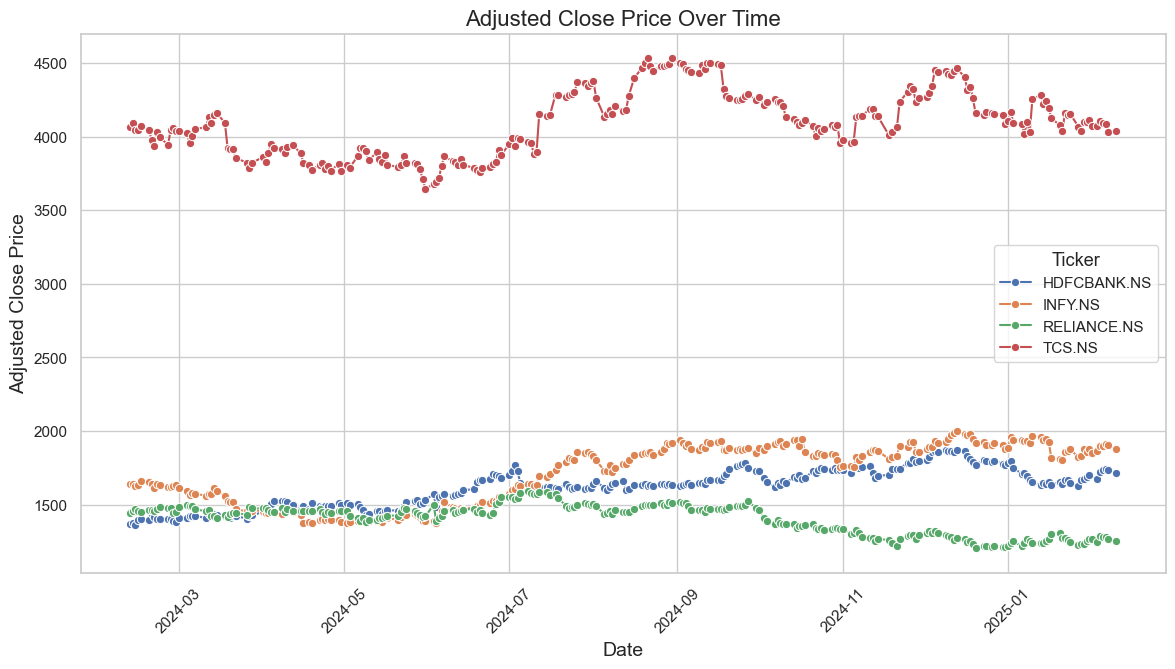

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

stock_data['Adj Close']=stock_data['Close']

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

In [62]:
stock_data.head(5)

Attribute,Date,Ticker,Close,High,Low,Open,Volume,Adj Close
0,2024-02-12,HDFCBANK.NS,1371.274658,1394.606082,1364.714219,1380.794683,17223906.0,1371.274658
1,2024-02-12,INFY.NS,1637.910645,1650.437942,1628.405479,1628.405479,3555808.0,1637.910645
2,2024-02-12,RELIANCE.NS,1442.524780,1451.116287,1432.592431,1450.867978,6674430.0,1442.524780
3,2024-02-12,TCS.NS,4061.874023,4100.218600,4046.939916,4071.041066,1013716.0,4061.874023
4,2024-02-13,HDFCBANK.NS,1375.664673,1385.431329,1365.700759,1373.198352,28790497.0,1375.664673


### Calcculating 50 and 200 MA for tickers along with volume traded

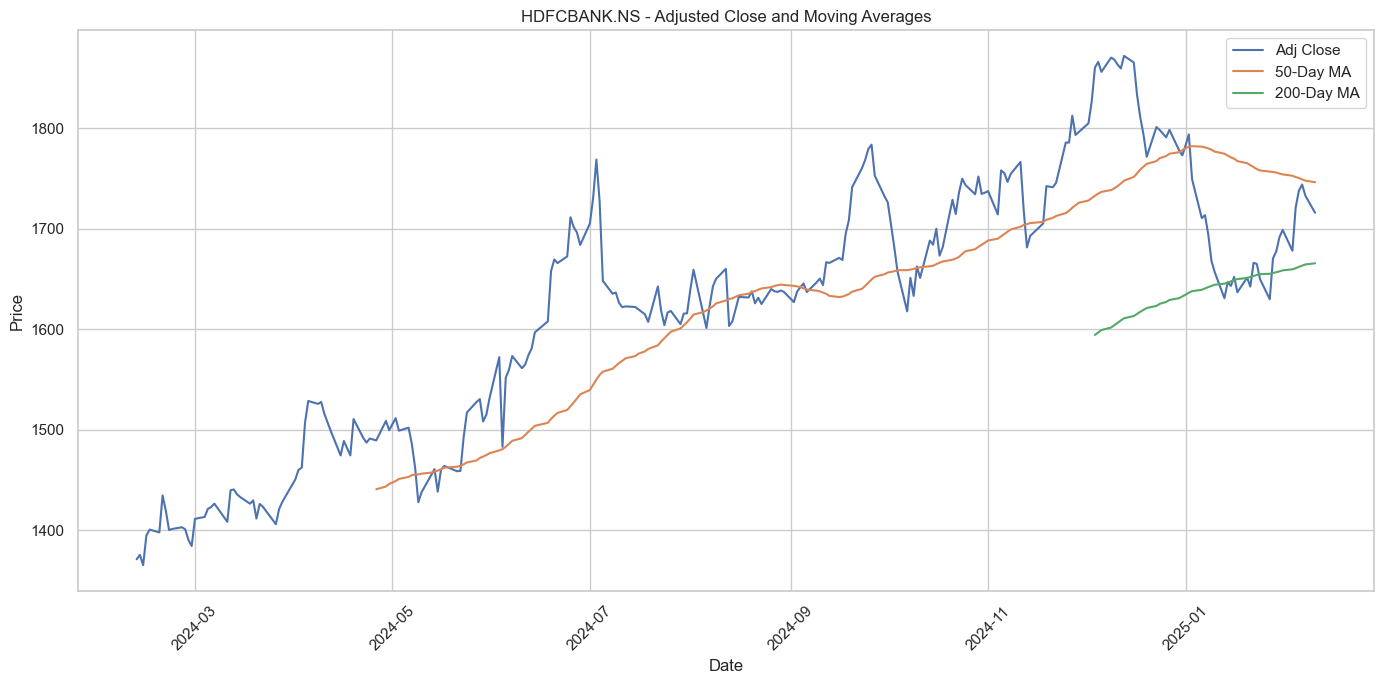

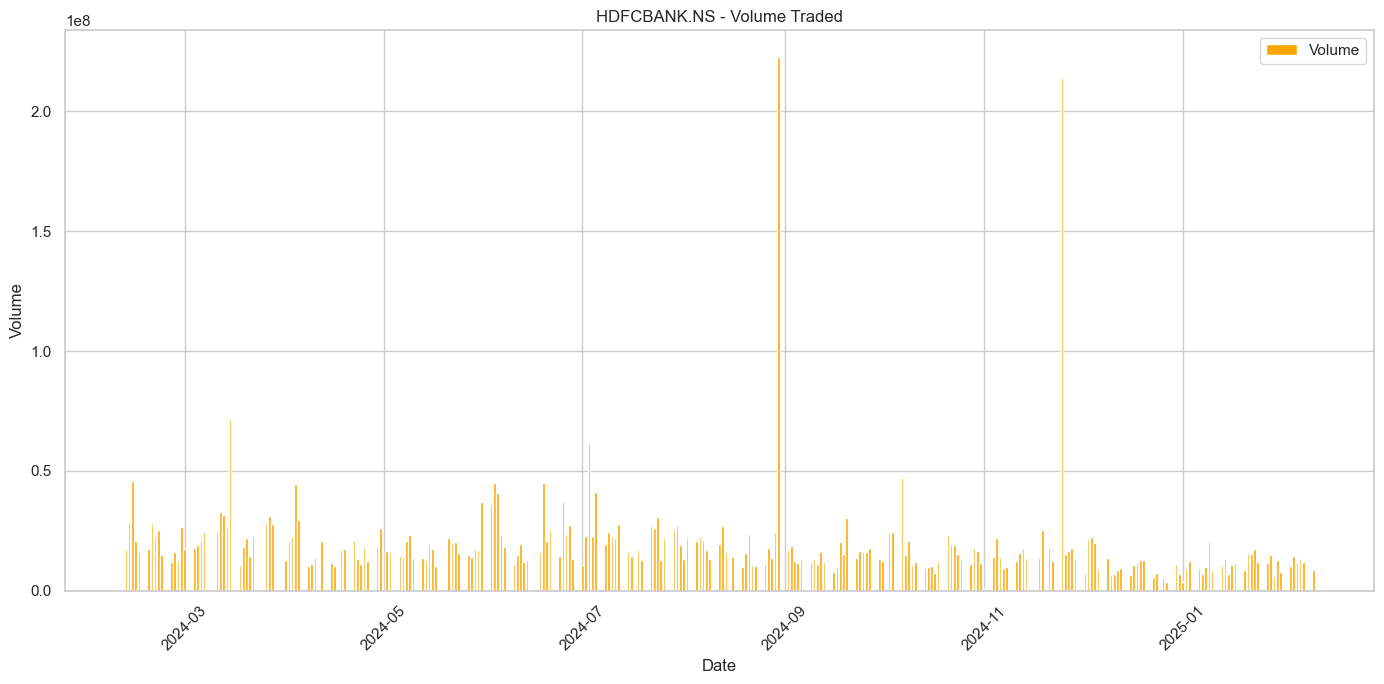

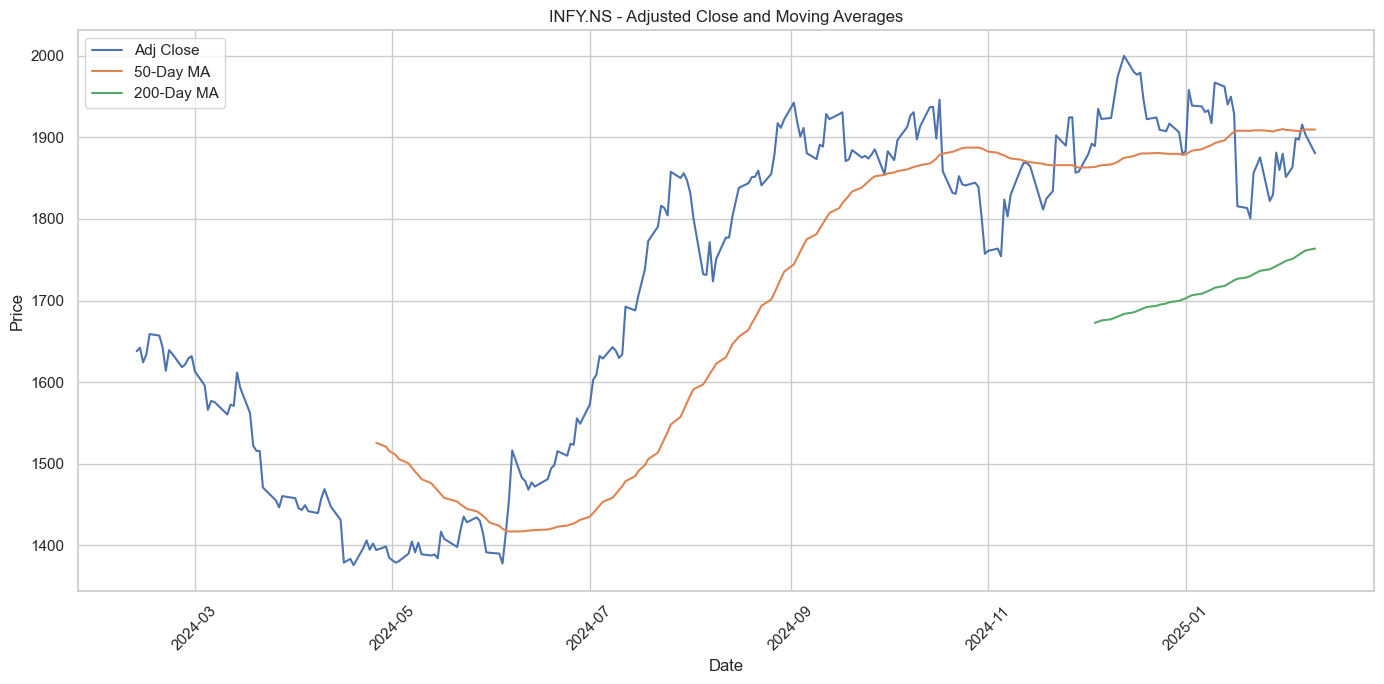

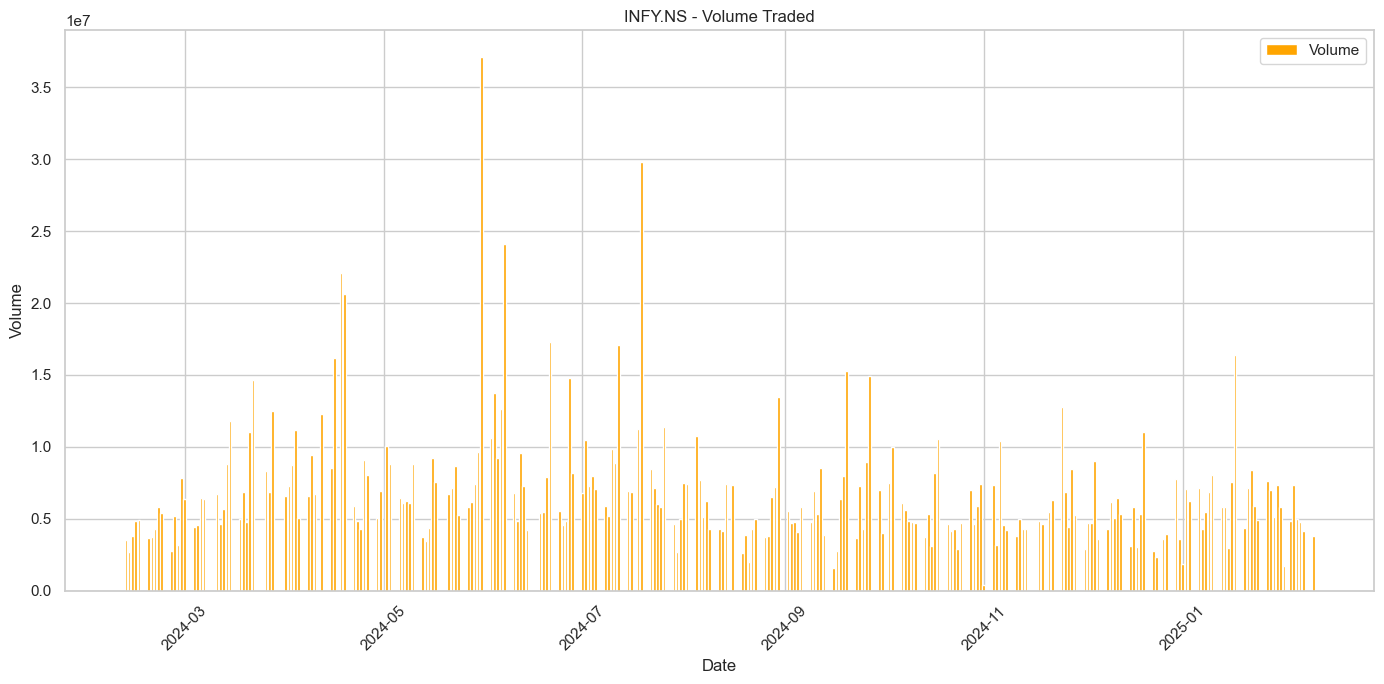

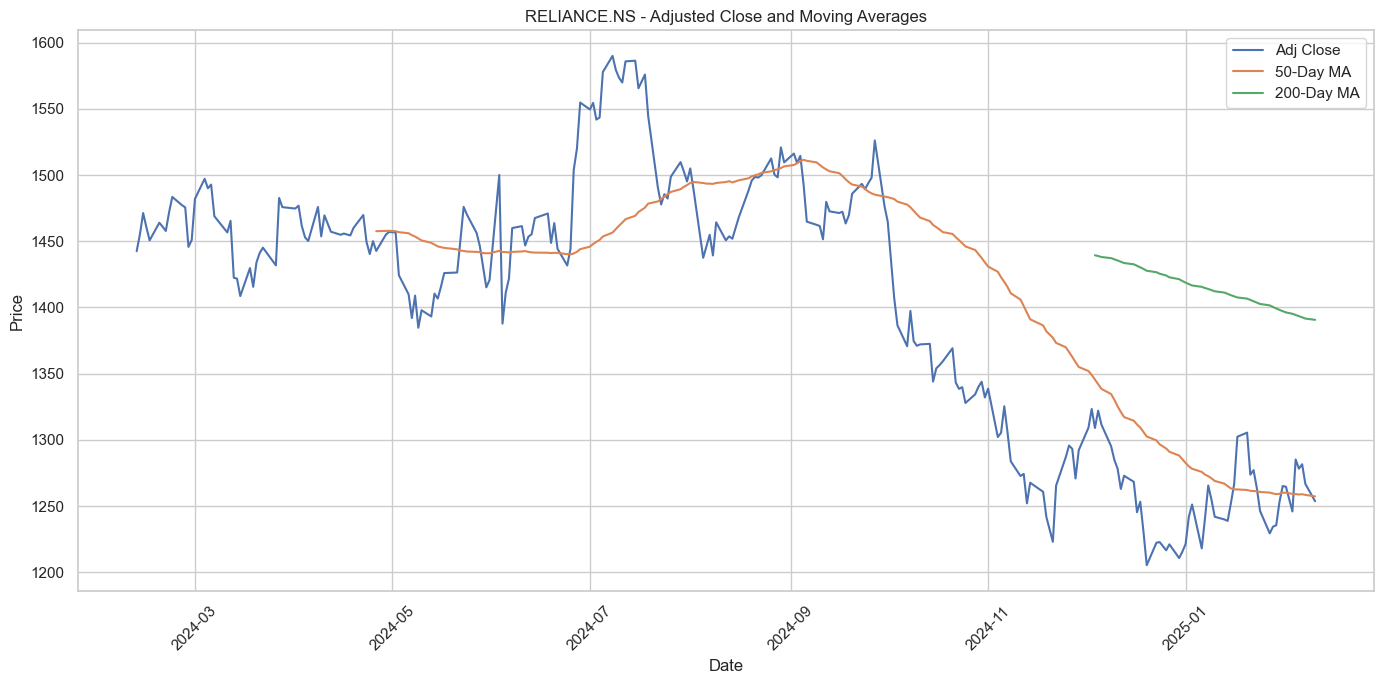

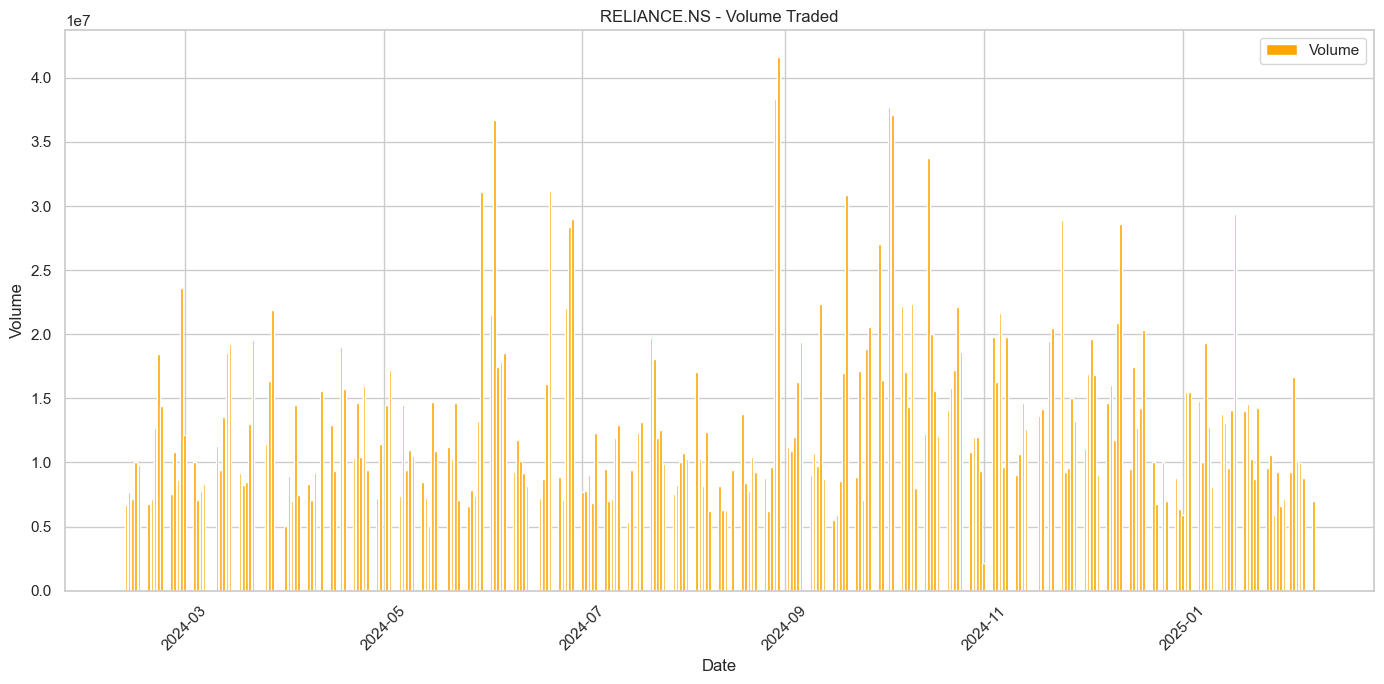

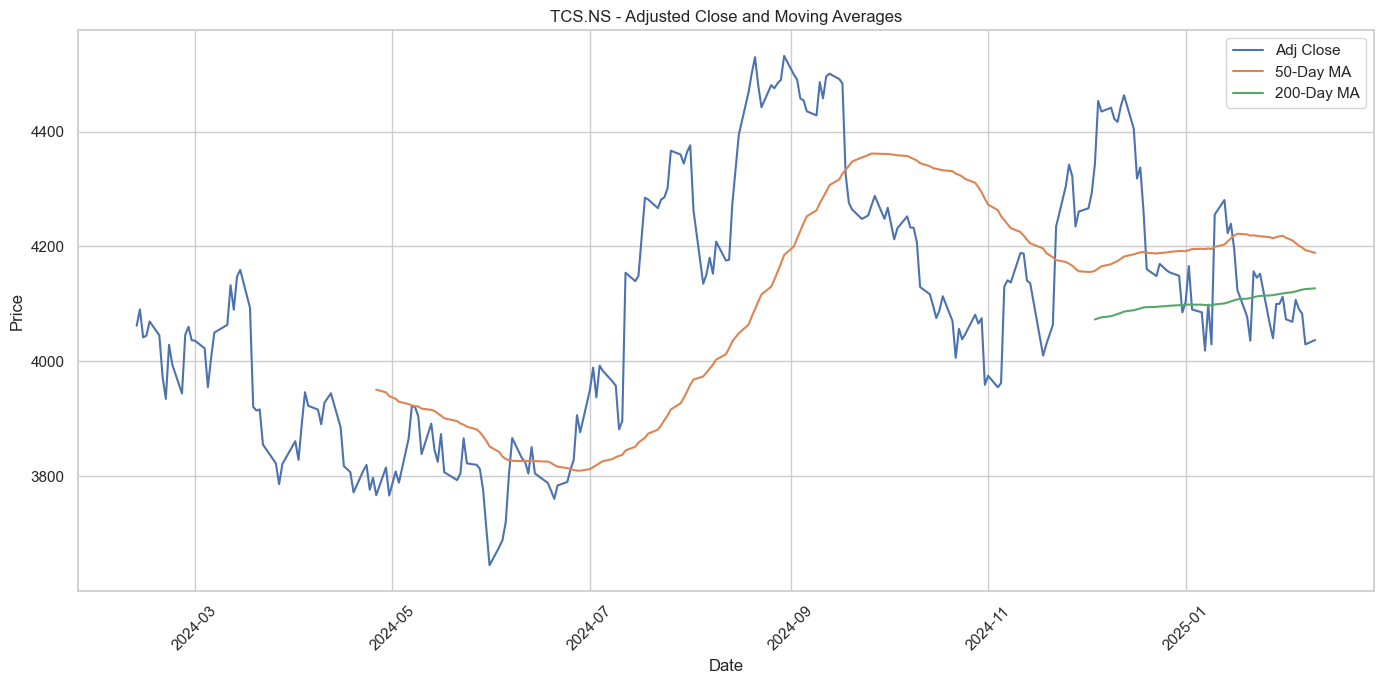

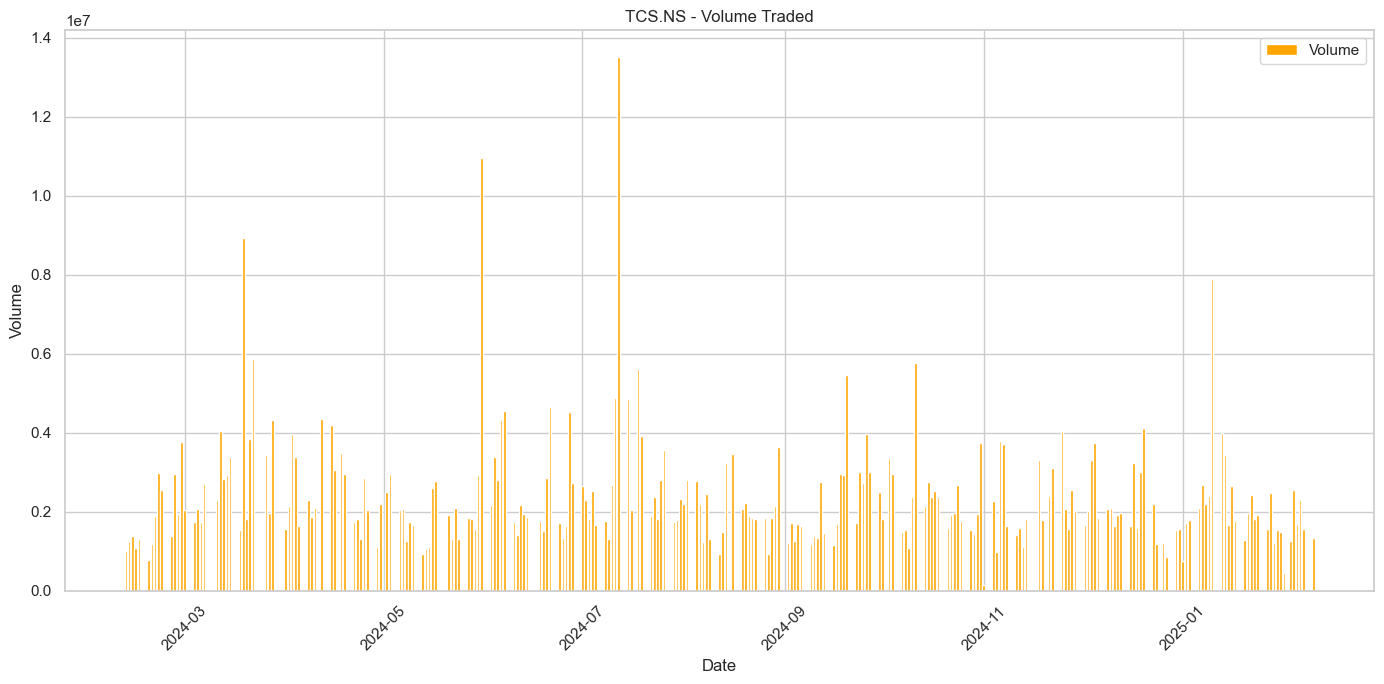

In [64]:
short_window = 50
long_window = 200


unique_tickers = stock_data['Ticker'].unique()

stock_data.set_index('Date', inplace=True)
for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    
    
    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Visualizing distribution of daily returns of tickers

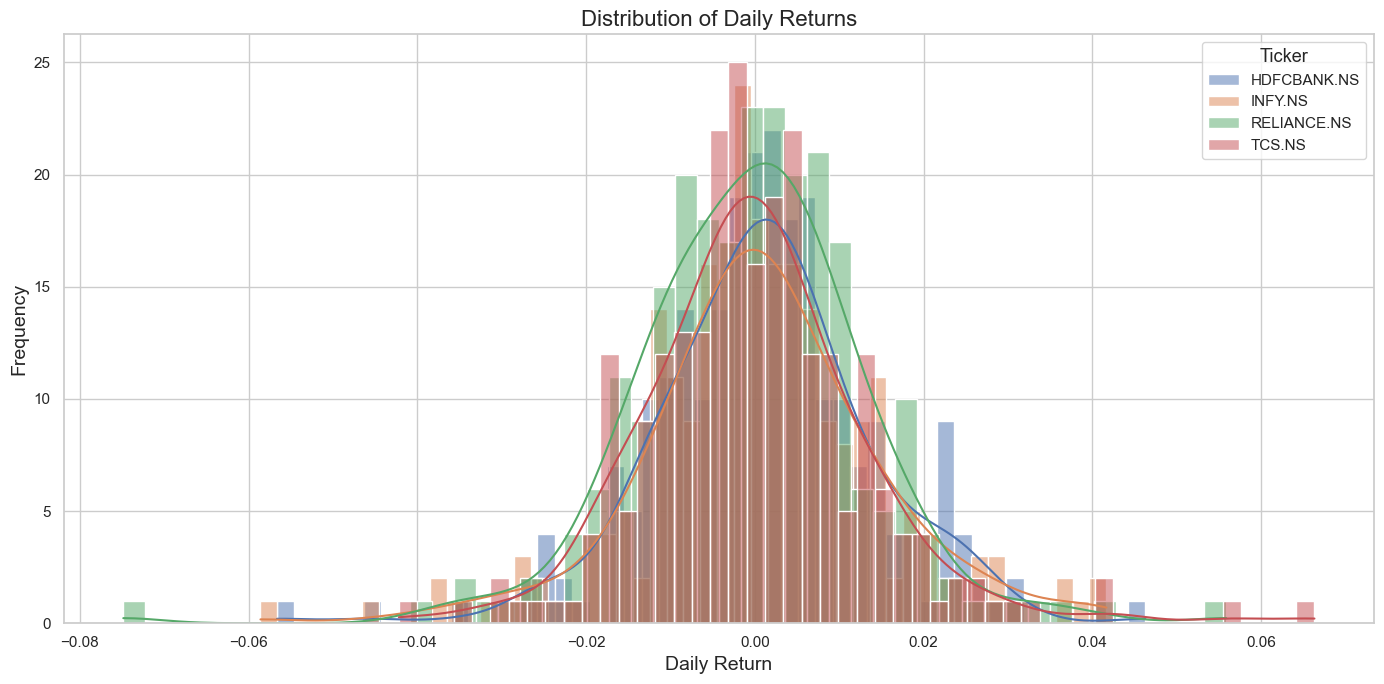

In [66]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

### Identifying the correlations between returns of tickers

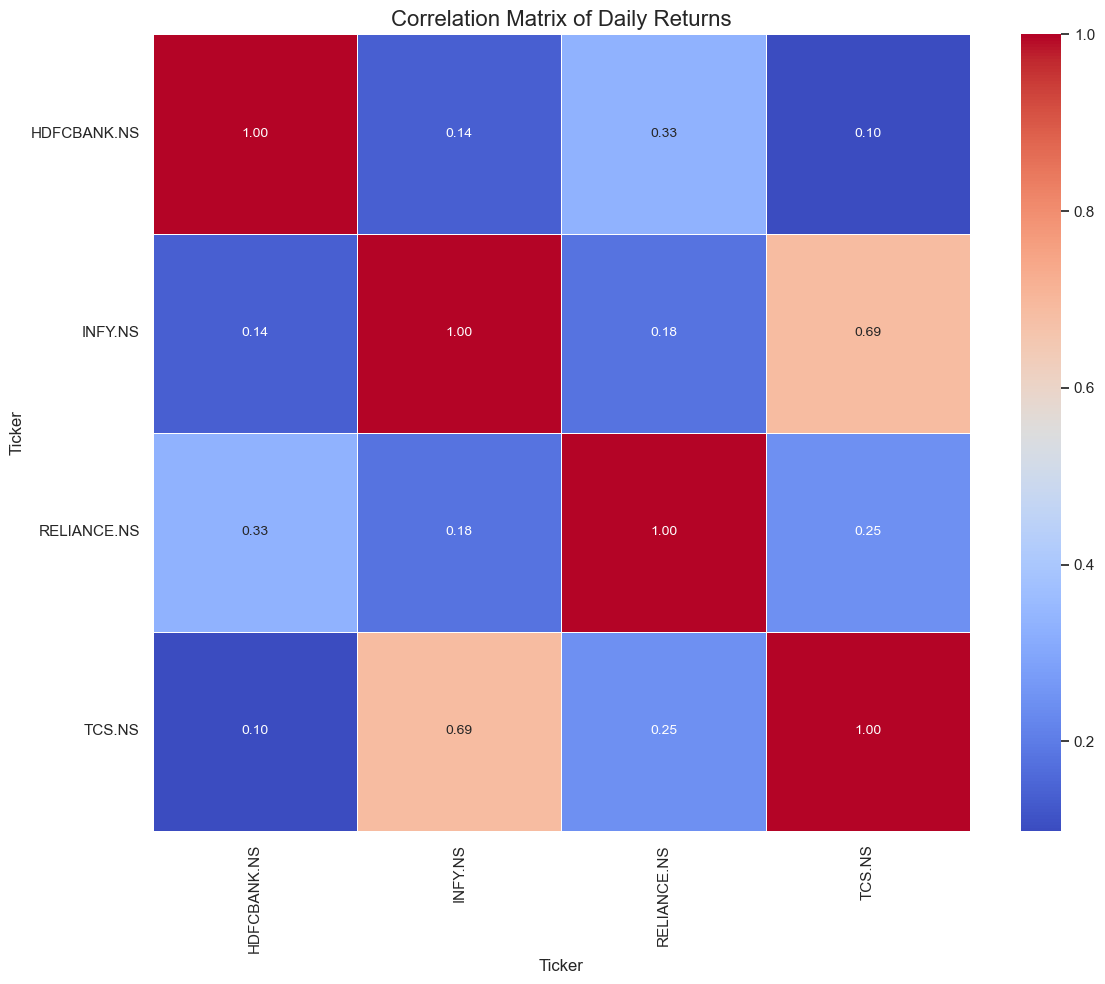

In [68]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [70]:
import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.250622,0.204863
INFY.NS,0.166215,0.225512
RELIANCE.NS,-0.119175,0.218897
TCS.NS,0.016046,0.212480


## Finding the efficient frontier

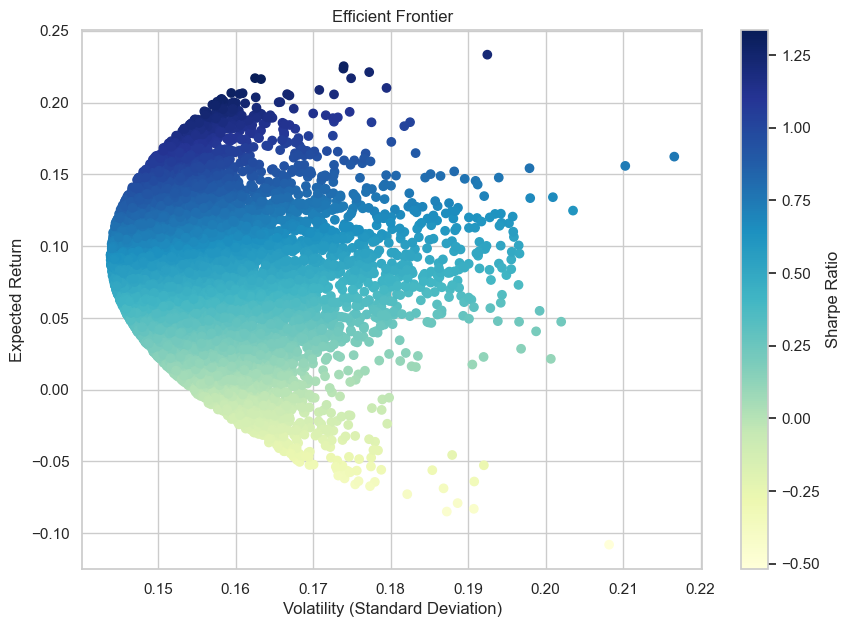

In [72]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [104]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.216973961481199, 0.16251758066493235, 1.335079937773262)

#### Getting sharpe ratio of 1.33 which means we are getting a good risk-adjusted return.

# The corresponding weights of stocks which should be there in the optimal portfolio

In [111]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.201287
1,INFY.NS,0.293840
2,RELIANCE.NS,0.248691
3,TCS.NS,0.256183
